In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import utils

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'dataset',
 'debug.log',
 'environment.yml',
 'heart_disease.ipynb',
 'heart_disease1.ipynb',
 'images',
 'requirements.txt',
 'utils.py',
 '__pycache__']

In [3]:
CSV_PATH = 'dataset/heart.csv'
CSV_PATH = os.path.join(os.getcwd(), CSV_PATH)
heart_df = pd.read_csv(CSV_PATH)

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Dataset parameters

1.  **Age**
2.	**Sex** (0 – female and 1 – male)
3.	**cp**: chest pain type

    - (1): typical angina
    - (2): atypical angina
    - (3): non-anginal pain
    - (4): asymptomatic
    
4.	**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5.	**chol**: serum cholesterol in mg/dl
6.	 **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.	**restecg**: resting electrocardiographic results

    - (0): normal
    - (1): having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - (2): showing probable or definite left ventricular hypertrophy by Estes' criteria
    
8.	**thalach**: maximum heart rate achieved
9.	**exang**: exercise induced angina (1 = yes; 0 = no)
10.	**oldpeak** = ST depression induced by exercise relative to rest
11.	**slope**: the slope of the peak exercise ST segment

    - (1): upsloping
    - (2): flat
    - (3): downsloping
    
12.	**ca**: number of major vessels (0-3) colored by flourosopy
13.	**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	**target**: diagnosis of heart disease (angiographic disease status)

    - (0): < 50% diameter narrowing
    - (1): > 50% diameter narrowing (Predicted value)
    


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

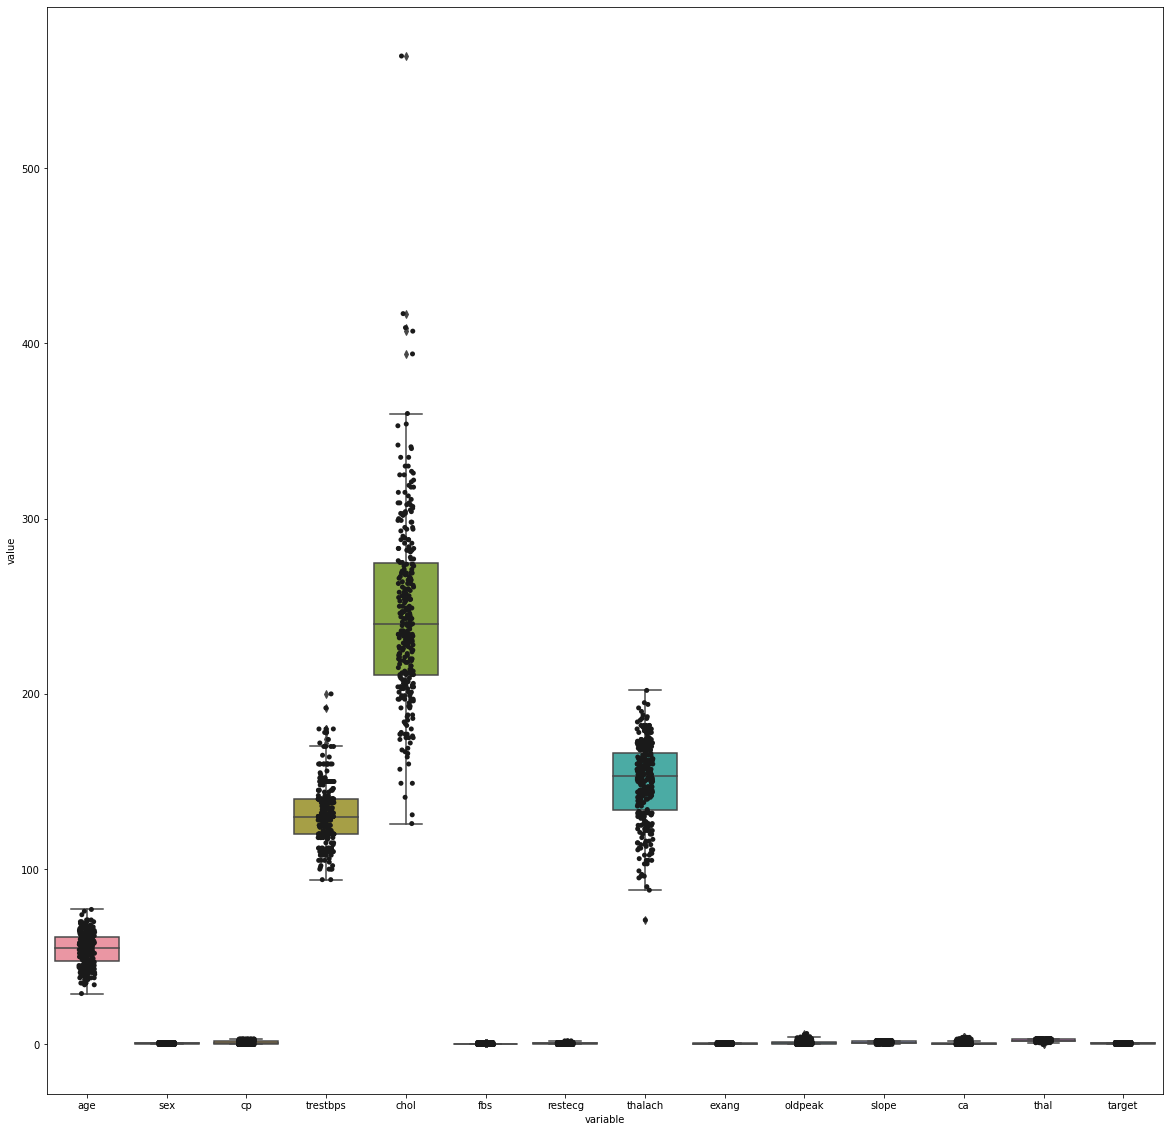

In [6]:
import seaborn as sns
_, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax)
sns.stripplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax, color='.1')

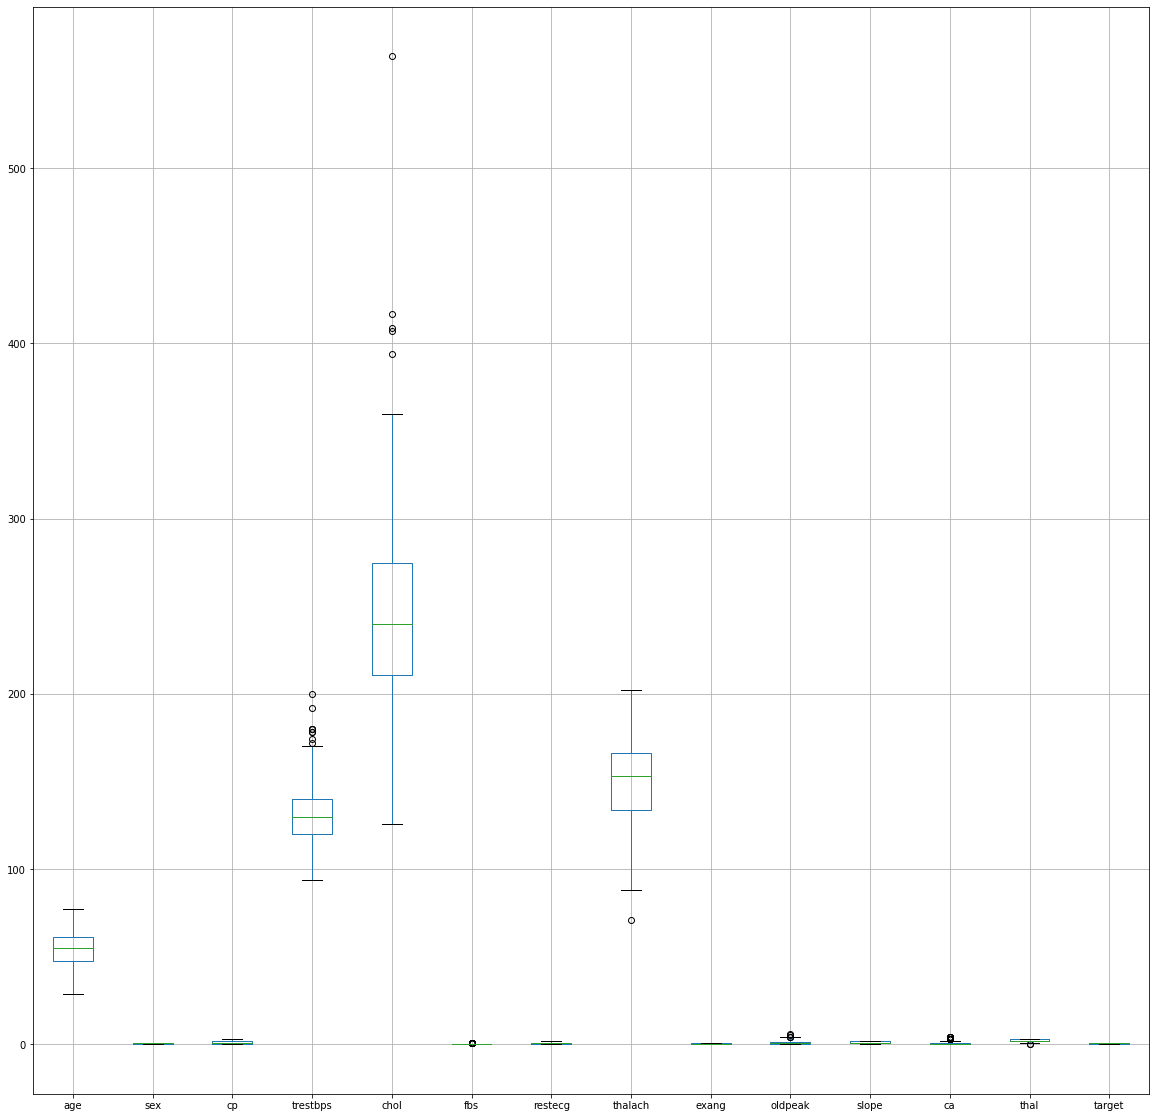

In [7]:
heart_df.boxplot(figsize=(20,20));

In [8]:
n_cols = len(heart_df.columns) - 1
n_cols

13

Saving figure boxplot


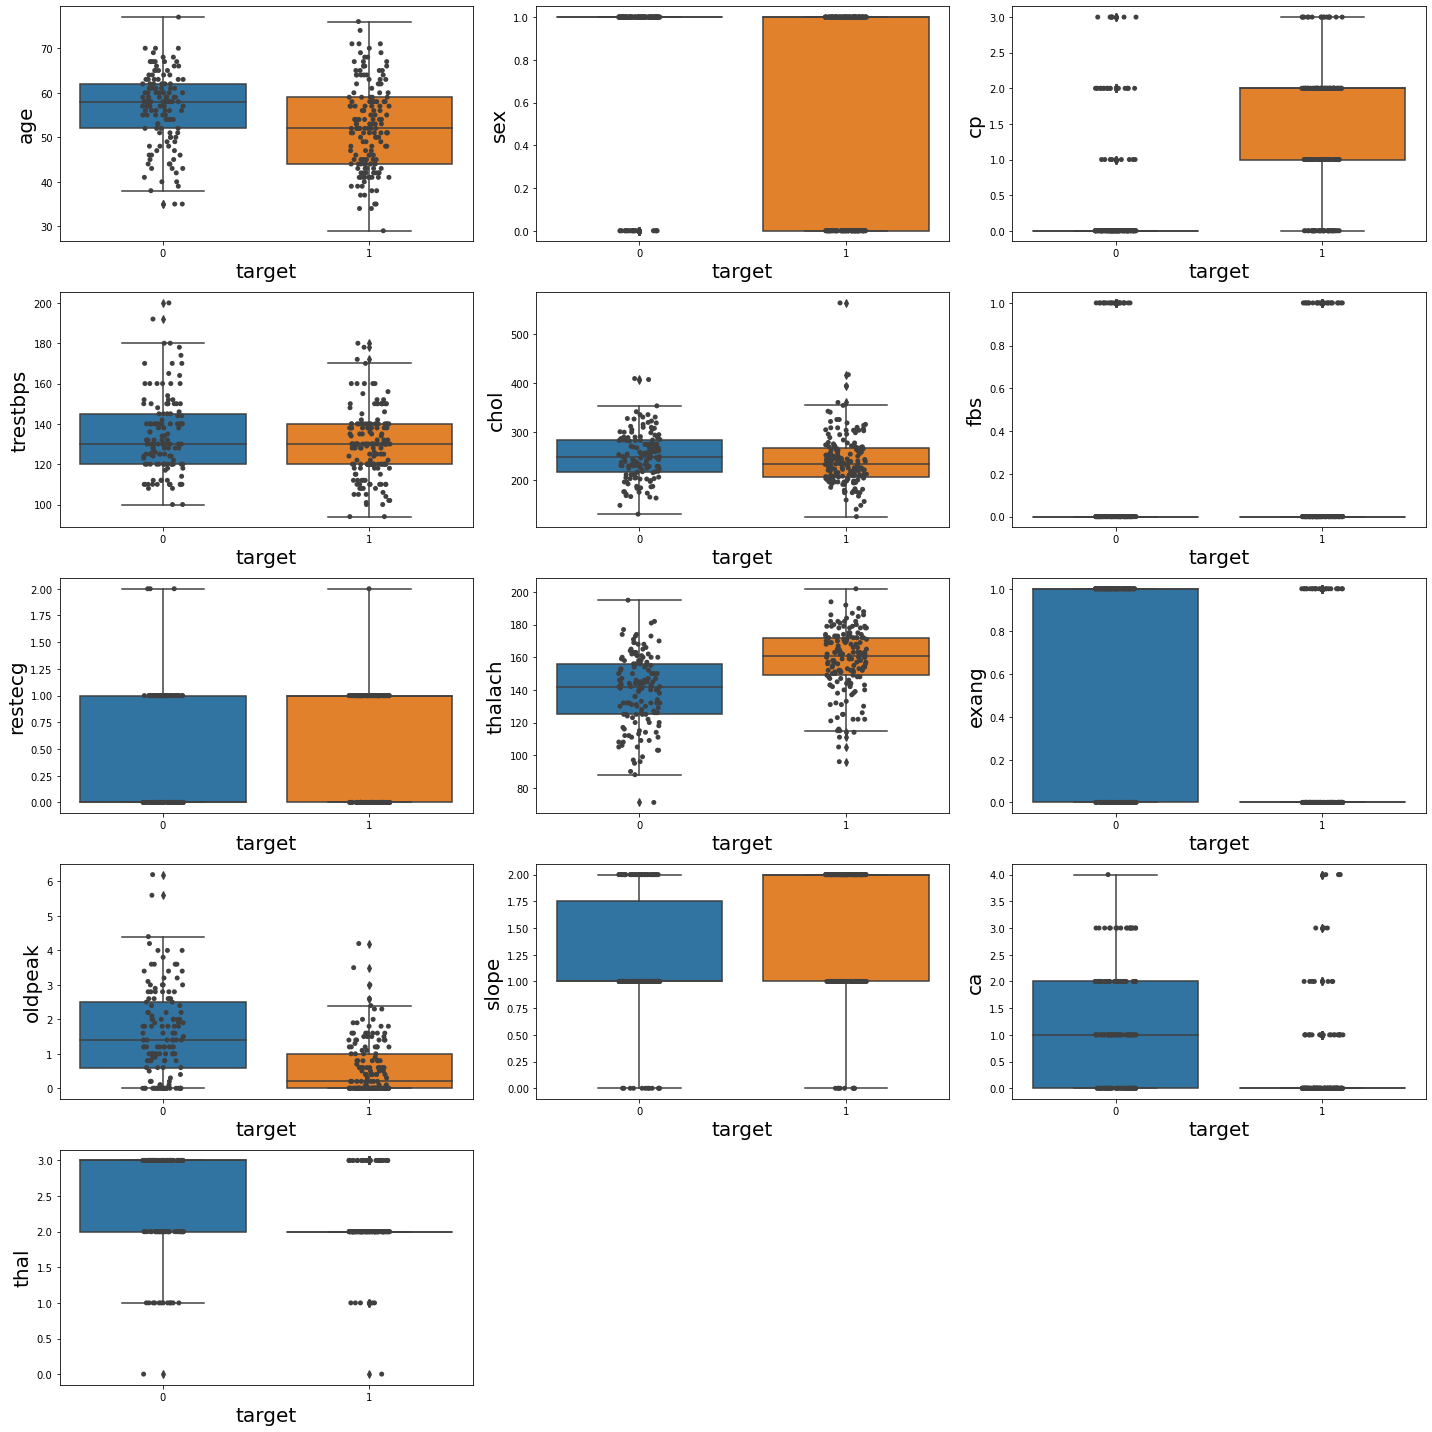

In [9]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > 12):
            col = heart_df.columns[idx]
            ax[i][j].xaxis.get_label().set_fontsize(20)
            ax[i][j].yaxis.get_label().set_fontsize(20)
            sns.boxplot(x='target', y=col, data=heart_df, ax=ax[i][j])
            sns.stripplot(x='target', y=col, data=heart_df, ax=ax[i][j], color='.25')
fig.delaxes(ax[4][1])
fig.delaxes(ax[4][2])
utils.save_fig('boxplot')

In [10]:
# columns that are categorical

cat_cols = ['sex', 
            'cp', 
            'fbs', 
            'restecg', 
            'exang', 
            'slope', 
            'ca', 
            'thal']

            age       sex        cp  trestbps      chol       fbs   restecg  \
count 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000   
mean   54.36634   0.68317   0.96700 131.62376 246.26403   0.14851   0.52805   
std     9.08210   0.46601   1.03205  17.53814  51.83075   0.35620   0.52586   
min    29.00000   0.00000   0.00000  94.00000 126.00000   0.00000   0.00000   
25%    47.50000   0.00000   0.00000 120.00000 211.00000   0.00000   0.00000   
50%    55.00000   1.00000   1.00000 130.00000 240.00000   0.00000   1.00000   
75%    61.00000   1.00000   2.00000 140.00000 274.50000   0.00000   1.00000   
max    77.00000   1.00000   3.00000 200.00000 564.00000   1.00000   2.00000   

        thalach     exang   oldpeak     slope        ca      thal    target  
count 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000  
mean  149.64686   0.32673   1.03960   1.39934   0.72937   2.31353   0.54455  
std    22.90516   0.46979   1.16108   0.61623   1.0226

(297, 14)

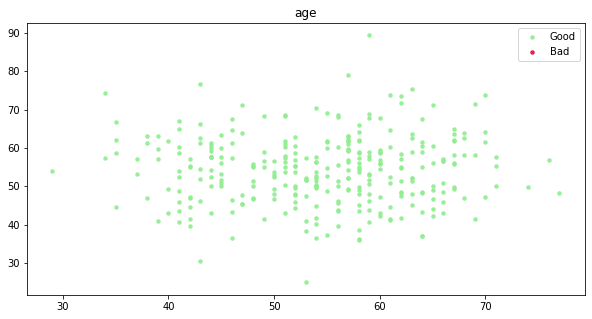

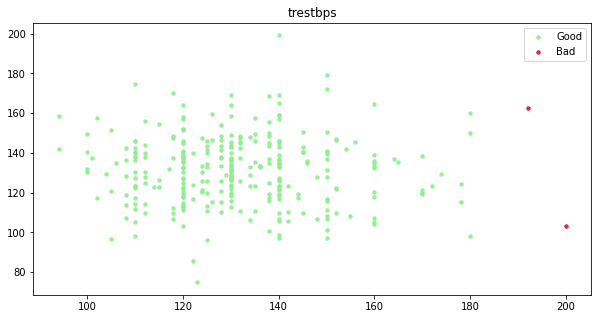

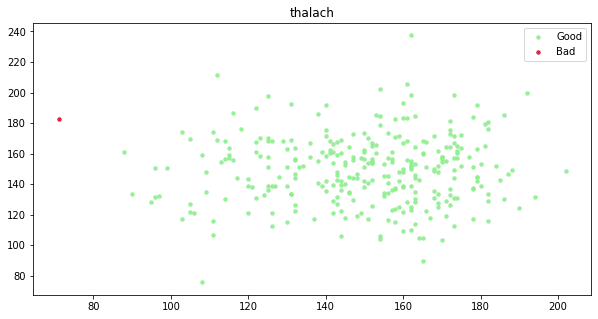

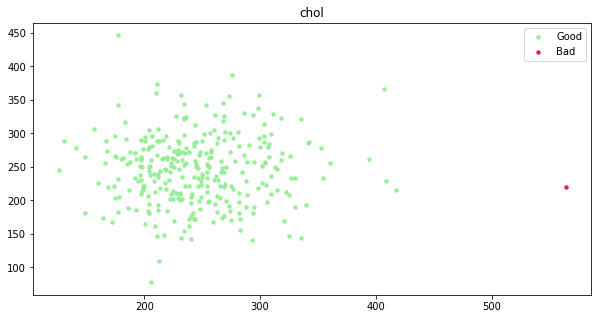

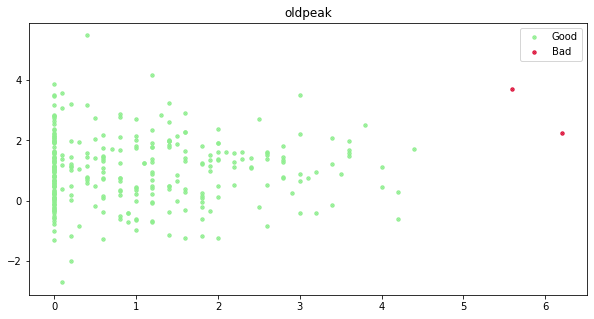

In [11]:
# use the non-categorical data and detect outliers.
heart_cp = heart_df.copy()

# tone down the large floats to readable format
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(heart_cp.describe())

precision = 3.35 # discard any sample with z score higher than 3 sigma

num_cols = list(set(heart_cp.columns[:-1]) - set(cat_cols))

count = 0
for col in num_cols:
    zscore_col = col + '_z_scr'
    heart_cp[zscore_col] = np.abs((heart_cp[col] - heart_cp[col].mean()) / heart_cp[col].std())
    good = heart_cp[zscore_col] < precision
    np.random.seed(42)
    normal_dist = np.random.normal(size=heart_cp.shape[0], loc=heart_cp[col].mean(), scale=heart_cp[col].std())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(col)
    ax.scatter(heart_cp.loc[good, col], normal_dist[good], s=2, label='Good', alpha=1, linewidths=3, color='lightgreen')
    ax.scatter(heart_cp.loc[~good, col], normal_dist[~good], s=2, label='Bad', alpha=1, linewidths=3, color='crimson')
    ax.legend()
#     pd.set_option('display.expand_frame_repr', False)
#     print(f'removed outlier for "{col}" column: \n{heart_df[~good]}')
    count += heart_cp[~good].shape[0]
    heart_cp.drop(heart_cp.loc[~good, :].index, inplace=True)
    del heart_cp[zscore_col]
    
print(f'Total No. of outliers found: {count}')

heart_cp.shape

In [12]:
heart_cp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60000,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20000,1,1,3,0


In [13]:
# train test split

from sklearn.model_selection import train_test_split
# first let us see the frequencies of each categorical columns
for cat in cat_cols:
    print(f'\ncounts for column: {cat}\n')
    print(heart_cp[cat].value_counts())
    
print(f'\ncounts for column: target\n')
print(heart_cp["target"].value_counts())


counts for column: sex

1    204
0     93
Name: sex, dtype: int64

counts for column: cp

0    139
2     86
1     49
3     23
Name: cp, dtype: int64

counts for column: fbs

0    253
1     44
Name: fbs, dtype: int64

counts for column: restecg

1    150
0    143
2      4
Name: restecg, dtype: int64

counts for column: exang

0    200
1     97
Name: exang, dtype: int64

counts for column: slope

2    141
1    138
0     18
Name: slope, dtype: int64

counts for column: ca

0    172
1     64
2     37
3     19
4      5
Name: ca, dtype: int64

counts for column: thal

2    165
3    112
1     18
0      2
Name: thal, dtype: int64

counts for column: target

1    164
0    133
Name: target, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X = heart_cp.iloc[:, :-1]
y = heart_cp.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y 
)

for cat in cat_cols:
    print(f'\ncounts for column: {cat}\n')
    print(X_train[cat].value_counts())
    
print(f'Train set shape: {X_train.shape}\nTest set shape: {X_test.shape}')


counts for column: sex

1    143
0     64
Name: sex, dtype: int64

counts for column: cp

0    97
2    62
1    35
3    13
Name: cp, dtype: int64

counts for column: fbs

0    180
1     27
Name: fbs, dtype: int64

counts for column: restecg

1    106
0     99
2      2
Name: restecg, dtype: int64

counts for column: exang

0    135
1     72
Name: exang, dtype: int64

counts for column: slope

2    104
1     94
0      9
Name: slope, dtype: int64

counts for column: ca

0    118
1     47
2     25
3     15
4      2
Name: ca, dtype: int64

counts for column: thal

2    116
3     79
1     11
0      1
Name: thal, dtype: int64
Train set shape: (207, 13)
Test set shape: (90, 13)


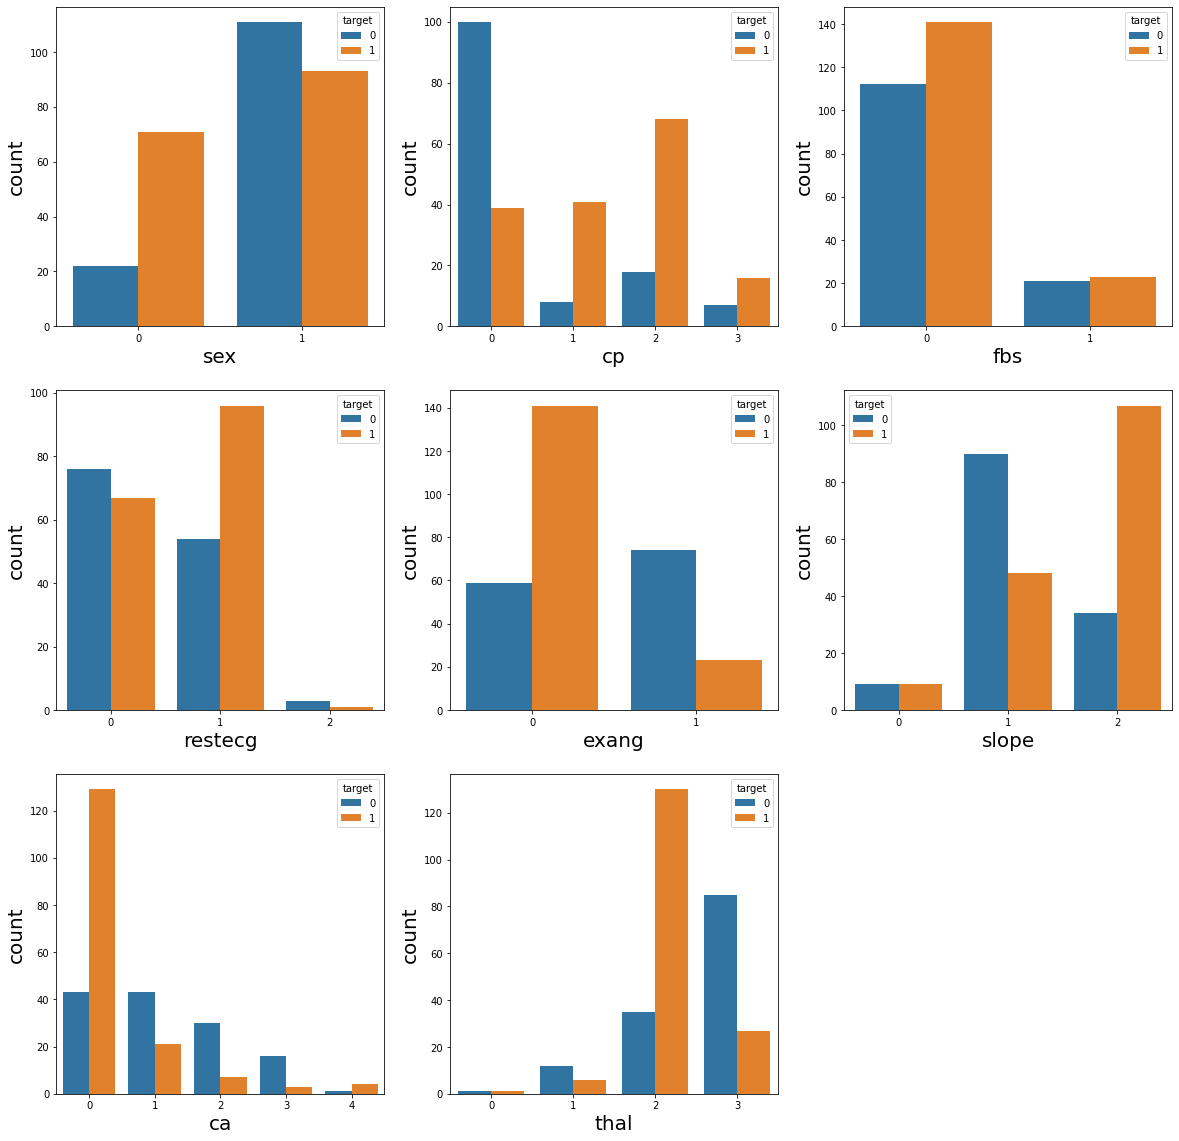

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > len(cat_cols)-1):
            col = cat_cols[idx]
            ax[i][j].xaxis.get_label().set_fontsize(20)
            ax[i][j].yaxis.get_label().set_fontsize(20)
            sns.countplot(hue='target', x=col, data=heart_cp, ax=ax[i][j])
fig.delaxes(ax[2][2])


In [16]:
# column standardization

# we will standardize the numerical (non-categorical) columns for the train set


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

col_normalizer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first'), cat_cols),
        ('scaler', StandardScaler(), num_cols)
    ],
    remainder="passthrough")

X_train_arr = col_normalizer.fit_transform(X_train)
y_train_arr = y_train.values

# transform the test set through similar pipeline before feeding into classification
X_test_arr = col_normalizer.fit_transform(X_test)
y_test_arr = y_test.values

In [17]:
# using SVM

from sklearn.svm import SVC

classifier = SVC(max_iter=1000, random_state=42, kernel="rbf", C=3.0)
classifier.fit(X_train_arr, y_train_arr)

SVC(C=3.0, max_iter=1000, random_state=42)

Confusion Matrix for train set using SVM, Accuracy: 0.9516908212560387, F1 score: 0.956896551724138
F1 score for train set
Confusion Matrix for test set using SVM, Accuracy: 0.7666666666666667, F1 score: 0.8000000000000002


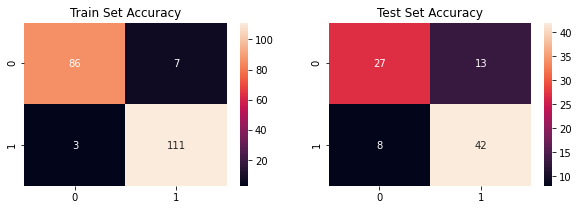

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

fig, ax =plt.subplots(1,2, figsize=(10,3))
ax[0].set_title("Train Set Accuracy")
ax[1].set_title("Test Set Accuracy")

y_train_pred = classifier.predict(X_train_arr)
confusion_train = confusion_matrix(y_train_arr, y_train_pred)
acc_train = accuracy_score(y_train_arr, y_train_pred)
f1_train = f1_score(y_train_arr, y_train_pred)
print(f'Confusion Matrix for train set using SVM, Accuracy: {acc_train}, F1 score: {f1_train}')
print(f'F1 score for train set')
sns.heatmap(confusion_train, annot=True, fmt='g', ax=ax[0]);

y_test_pred = classifier.predict(X_test_arr)
confusion_test = confusion_matrix(y_test_arr, y_test_pred)
acc_test = accuracy_score(y_test_arr, y_test_pred)
f1_test = f1_score(y_test_arr, y_test_pred)
print(f'Confusion Matrix for test set using SVM, Accuracy: {acc_test}, F1 score: {f1_test}')
sns.heatmap(confusion_test, annot=True, fmt='g', ax=ax[1]);

In [19]:
X_def = heart_cp.iloc[:, :-1].values
y_def = heart_cp.iloc[:, -1].values
X_tr, X_ts, y_tr, y_ts = train_test_split(X_def, y_def, random_state=42, shuffle=True, test_size=0.3)

classifier.fit(X_tr, y_tr)

print(f'Train score for SVM on unclean dataset: {classifier.score(X_tr, y_tr)}')
print(f'Test score for SVM on unclean dataset: {classifier.score(X_ts, y_ts)}')

Train score for SVM on unclean dataset: 0.714975845410628
Test score for SVM on unclean dataset: 0.6555555555555556
